In [5]:
trials <- 10000 
simlist <- numeric(trials)
toppings <- c("pepper","pepperoni","pineapple",
"prawns","prosciutto")
for (i in 1:trials) {
pineapple <- 0
pepperoni <- 0
while (pineapple == 0) {

pick <- sample(toppings,1)
if (pick == "pepperoni") pepperoni <- pepperoni + 1
if (pick == "pineapple") pineapple <- 1 }
simlist[i] <- pepperoni }
mean(simlist)

[1] 0.9918

In [6]:
# Simulate lipping three fair coins and counting the number of heads X.
# (a) Use your simulation to estimate P(X = 1) and E(X).
# (b) Modify the above to allow for a biased coin where P(Heads) = 3∕4

# Path: Untitled-2.ipynb

# (a) Use your simulation to estimate P(X = 1) and E(X).

trials <- 10000
simlist <- numeric(trials)
for (i in 1:trials) {
heads <- 0
for (j in 1:3) {
if (sample(c("H","T"),1) == "H") heads <- heads + 1 }
simlist[i] <- heads }
mean(simlist == 1)
mean(simlist)



[1] 0.3687

[1] 1.509

In [7]:
# (b) Modify the above to allow for a biased coin where P(Heads) = 3∕4

trials <- 10000
simlist <- numeric(trials)
for (i in 1:trials) {
heads <- 0
for (j in 1:3) {
if (sample(c("H","T"),1,prob=c(3/4,1/4)) == "H") heads <- heads + 1 }
simlist[i] <- heads }
mean(simlist == 1)
mean(simlist)


[1] 0.1425

[1] 2.2467

In [17]:
# Cards are drawn from a standard deck, with replacement, until an ace appears. Simulate the mean and variance of the number of cards required.

# Path: Untitled-2.ipynb
trials <- 10000
simlist <- numeric(trials)
for (i in 1:trials) {
cards <- 0
while (cards == 0) {
cards <- cards + 1
if (sample(c("A","2","3","4","5","6","7","8","9","10","J","Q","K"),1) == "A") break }
simlist[i] <- cards }
mean(simlist)
var(simlist)



[1] 1

[1] 0

In [18]:
# The time until a bus arrives has an exponential distribution with mean 30 minutes.
# (a) Use the command rexp() to simulate the probability that the bus arrives in the first 20 minutes.
# (b) Use the command pexp() to compare with the exact probability.

# Path: Untitled-2.ipynb

# (a) Use the command rexp() to simulate the probability that the bus arrives in the first 20 minutes.

trials <- 10000
simlist <- numeric(trials)
for (i in 1:trials) {
if (rexp(1,1/30) < 20) simlist[i] <- 1
else simlist[i] <- 0 }
mean(simlist)

# (b) Use the command pexp() to compare with the exact probability.

pexp(20,1/30)


[1] 0.487

[1] 0.4865829

In [19]:
# gamblersruin.R
# Example 1.11

# gamble(k, n, p)
  #   k: Gambler's initial state
  #   n: Gambler plays until either $n or Ruin
  #   p: Probability of winning $1 at each play
  #   Function returns 1 if gambler is eventually ruined
  #                    returns 0 if gambler eventually wins $n
  
gamble <- function(k,n,p) {
  
	stake <- k # Capital 
	
	while (stake > 0 & stake < n) {
		bet <- sample(c(-1,1),1,prob=c(1-p,p))
		stake <- stake + bet
	}
	
	if (stake == 0) 
	   return(1) 
	else 
	  return(0)
	}   

k <- 20 
n <-  60  
p <- 1/2  # Probabilidad de ganar cada intento
trials <- 1000 # Numero de intentos del juego
simlist <- replicate(trials, gamble(k, n, p)) # LLevamos a cabo varios intentos del juego y guardamos los resultados en un vector
mean(simlist) # Estimate of probability that gambler is ruined
# For p = 0.5, exact probability is (n-k)/n 


x<- 20  # Capital inicial 
b<- 60  # Monto total
p<- 0.5 # Probabilidad de victoria de cada juego
trials<- 1000  # Numero de veces que se llevara a cabo la simulacion de ruina del                      jugador
simlist<- replicate(trials,gamble(x,b,p)) # replicamos los juegos muchas veces
mean(simlist)

[1] 0.676

[1] 0.654

In [20]:
# R: See the script ile gamblersruin.R. A gambler starts with a $60 initial stake.

# (a) The gambler wins, and loses, each round with probability p = 0.50. Simulate the probability the gambler wins $100 before he loses everything.

# (b) The gambler wins each round with probability p = 0.51. Simulate the probability the gambler wins $100 before he loses everything.

# Path: Untitled-2.ipynb

# (a) The gambler wins, and loses, each round with probability p = 0.50. Simulate the probability the gambler wins $100 before he loses everything.

k <- 60
n <- 100
p <- 1/2
trials <- 10000
simlist <- replicate(trials, gamble(k, n, p))
mean(simlist)

# (b) The gambler wins each round with probability p = 0.51. Simulate the probability the gambler wins $100 before he loses everything.

k <- 60
n <- 100
p <- 51/100
trials <- 10000
simlist <- replicate(trials, gamble(k, n, p))
mean(simlist)



[1] 0.4077

[1] 0.0734

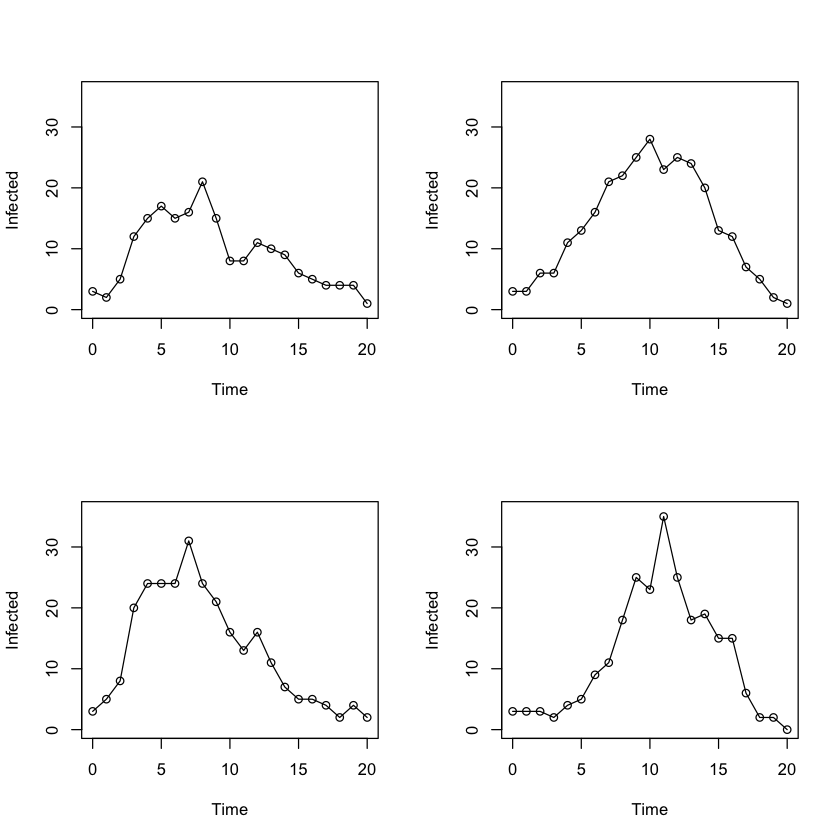

In [21]:
# ReedFrost.R
# Exercise 1.25
# Simulate graphs in Figure 1.2

par(mfrow=c(2,2))
set.seed(12)
for (k in 1:4) {
z = 0.004
steps  <- 21
sus <- numeric(steps)
inf <- numeric(steps)
sus[1] <- 400
inf[1] <- 3

for (t in 1:(steps-1)) {
inf[t+1] <- rbinom(1,sus[t],1-(1-z)^inf[t])
sus[t+1] <- sus[t] - inf[t+1]
}
plot((0:(steps-1)),inf,type="o",yaxt="n",ylim=c(0,36),xlab="Time",ylab="Infected")
axis(2,at=c(0,10,20,30))
}
#seed: 12

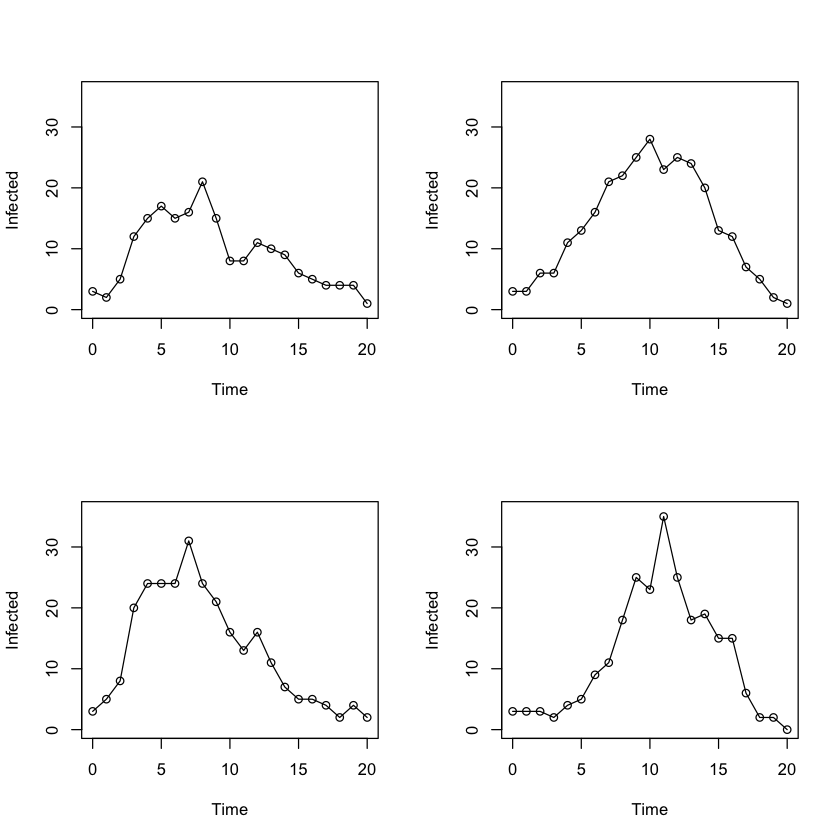

In [23]:
# See Example 1.2 and the script ile ReedFrost.R. Observe the effect on the course of the disease by changing the initial values for the number of people susceptible and infected. How does increasing the number of infected people affect the duration of the disease?

# Path: Untitled-2.ipynb

par(mfrow=c(2,2))
set.seed(12)
for (k in 1:4) {
z <- 0.004
steps <- 21
sus <- numeric(steps)
inf <- numeric(steps)
sus[1] <- 400
inf[1] <- 3

for (t in 1:(steps-1)) {
inf[t+1] <- rbinom(1,sus[t],1-(1-z)^inf[t])
sus[t+1] <- sus[t] - inf[t+1]
}
plot((0:(steps-1)),inf,type="o",yaxt="n",ylim=c(0,36),xlab="Time",ylab="Infected")
axis(2,at=c(0,10,20,30))
}
#seed: 12



In [24]:
# R: Simulate the results of Exercise 1.28. Estimate the mean and variance of the number of accidents per day.

# 1.28 On any day, the number of accidents on the highway has a Poisson distribution with parameter Λ. The parameter Λ varies from day to day and is itself a random variable. Find the mean and variance of the number of accidents per day when Λ is uniformly distributed on (0, 3).

# Path: Untitled-2.ipynb

trials <- 10000
simlist <- numeric(trials)
for (i in 1:trials) {
simlist[i] <- rpois(1,runif(1,0,3))
}
mean(simlist)
var(simlist)


[1] 1.5086

[1] 2.287355